<a href="https://colab.research.google.com/github/Brnfdes/graph_mining/blob/main/graph_mining_got.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mineração de grafos utilizando dados da série Game of Thrones**
###O relatório apresenta uma comparação das redes de interações entre personagens da primeira e oitava temporada de Game of Thrones. As redes foram construídas a partir de dados de interações dos personagens e analisadas com base em suas propriedades estruturais e medidas de centralidade.

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import community.community_louvain as cl
from matplotlib.colors import ListedColormap

In [3]:
S1 = pd.read_csv("/content/drive/MyDrive/Colab/Técnicas de Graph mind/got-s1-edges.csv", delimiter=",")
Grafo_Temporada1 = nx.from_pandas_edgelist(S1, source='Source', target='Target', edge_attr='Weight')

S8 = pd.read_csv("/content/drive/MyDrive/Colab/Técnicas de Graph mind/got-s8-edges.csv", delimiter=",")
Grafo_Temporada2 = nx.from_pandas_edgelist(S8, source='Source', target='Target', edge_attr='Weight')

##**1**: Comparar Distribuições de Graus, Grau Médio, Densidade e Transitividade

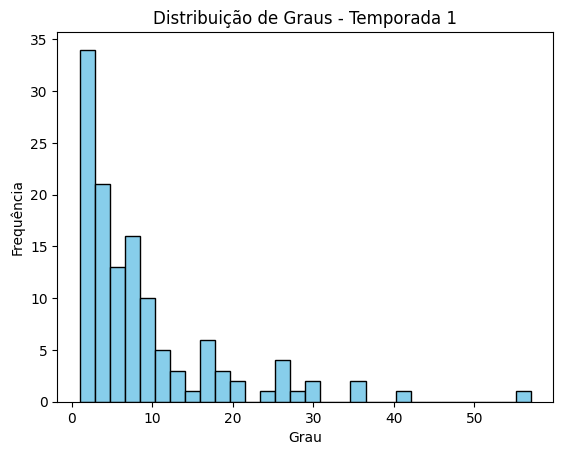

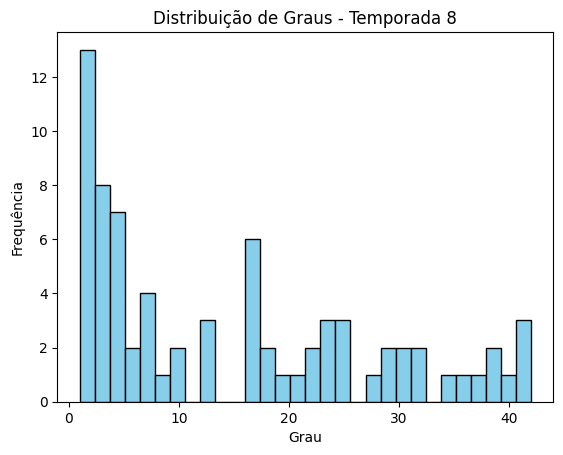

In [4]:
def plot_degree_distribution(G, title):
    degrees = [degree for _, degree in G.degree()]
    plt.hist(degrees, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição de Graus - {title}')
    plt.xlabel('Grau')
    plt.ylabel('Frequência')
    plt.show()
plot_degree_distribution(Grafo_Temporada1, 'Temporada 1')
plot_degree_distribution(Grafo_Temporada2, 'Temporada 8')

In [5]:
def grau_medio(G):
    return sum(dict(G.degree()).values()) / len(G)

densidade_s1 = nx.density(Grafo_Temporada1)
densidade_s8 = nx.density(Grafo_Temporada2)

transitividade_s1 = nx.transitivity(Grafo_Temporada1)
transitividade_s8 = nx.transitivity(Grafo_Temporada2)

print(f"Grau Médio - Temporada 1: {grau_medio(Grafo_Temporada1)}")
print(f"Grau Médio - Temporada 8: {grau_medio(Grafo_Temporada2)}")
print(f"Densidade - Temporada 1: {densidade_s1}")
print(f"Densidade - Temporada 8: {densidade_s8}")
print(f"Transitividade - Temporada 1: {transitividade_s1}")
print(f"Transitividade - Temporada 8: {transitividade_s8}")

Grau Médio - Temporada 1: 8.714285714285714
Grau Médio - Temporada 8: 14.945945945945946
Densidade - Temporada 1: 0.06971428571428571
Densidade - Temporada 8: 0.20473898556090336
Transitividade - Temporada 1: 0.38325183374083127
Transitividade - Temporada 8: 0.6441837028505615


##**2**: Personagens Centrais


In [6]:
centralidade_grau_s1 = nx.degree_centrality(Grafo_Temporada1)
centralidade_grau_s8 = nx.degree_centrality(Grafo_Temporada2)

centralidade_intermediacao_s1 = nx.betweenness_centrality(Grafo_Temporada1)
centralidade_intermediacao_s8 = nx.betweenness_centrality(Grafo_Temporada2)

centralidade_proximidade_s1 = nx.closeness_centrality(Grafo_Temporada1)
centralidade_proximidade_s8 = nx.closeness_centrality(Grafo_Temporada2)

centralidade_autovetor_s1 = nx.eigenvector_centrality(Grafo_Temporada1)
centralidade_autovetor_s8 = nx.eigenvector_centrality(Grafo_Temporada2)

def top_3_centrality(centrality):
    return sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:3]

print("Top 3 Personagens Centrais (Temporada 1)")
print("Centralidade de Grau:", top_3_centrality(centralidade_grau_s1))
print("Centralidade de Intermediação:", top_3_centrality(centralidade_intermediacao_s1))
print("Centralidade de Proximidade:", top_3_centrality(centralidade_proximidade_s1))
print("Centralidade de Autovetor:", top_3_centrality(centralidade_autovetor_s1))

print("\nTop 3 Personagens Centrais (Temporada 8)")
print("Centralidade de Grau:", top_3_centrality(centralidade_grau_s8))
print("Centralidade de Intermediação:", top_3_centrality(centralidade_intermediacao_s8))
print("Centralidade de Proximidade:", top_3_centrality(centralidade_proximidade_s8))
print("Centralidade de Autovetor:", top_3_centrality(centralidade_autovetor_s8))


Top 3 Personagens Centrais (Temporada 1)
Centralidade de Grau: [('NED', 0.456), ('TYRION', 0.328), ('ROBERT', 0.28800000000000003)]
Centralidade de Intermediação: [('NED', 0.3032802081478768), ('TYRION', 0.16302743524270866), ('CATELYN', 0.11828405295282027)]
Centralidade de Proximidade: [('NED', 0.628140703517588), ('ROBERT', 0.5530973451327433), ('CATELYN', 0.5506607929515418)]
Centralidade de Autovetor: [('NED', 0.3150820196903642), ('ROBERT', 0.24818996690338857), ('CERSEI', 0.23926199958075808)]

Top 3 Personagens Centrais (Temporada 8)
Centralidade de Grau: [('SAM', 0.5753424657534246), ('DAENERYS', 0.5616438356164384), ('TYRION', 0.5616438356164384)]
Centralidade de Intermediação: [('DAENERYS', 0.13390159981644), ('SAM', 0.09913291196077363), ('ARYA', 0.09902087596468986)]
Centralidade de Proximidade: [('SAM', 0.6770077894171367), ('DAENERYS', 0.670434898257747), ('TYRION', 0.670434898257747)]
Centralidade de Autovetor: [('TYRION', 0.21789621436284157), ('SAM', 0.217151605650176

##**3**: Detecção de Comunidades


<ipython-input-7-9c83ba09a01d>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', max(communities.values()) + 1)


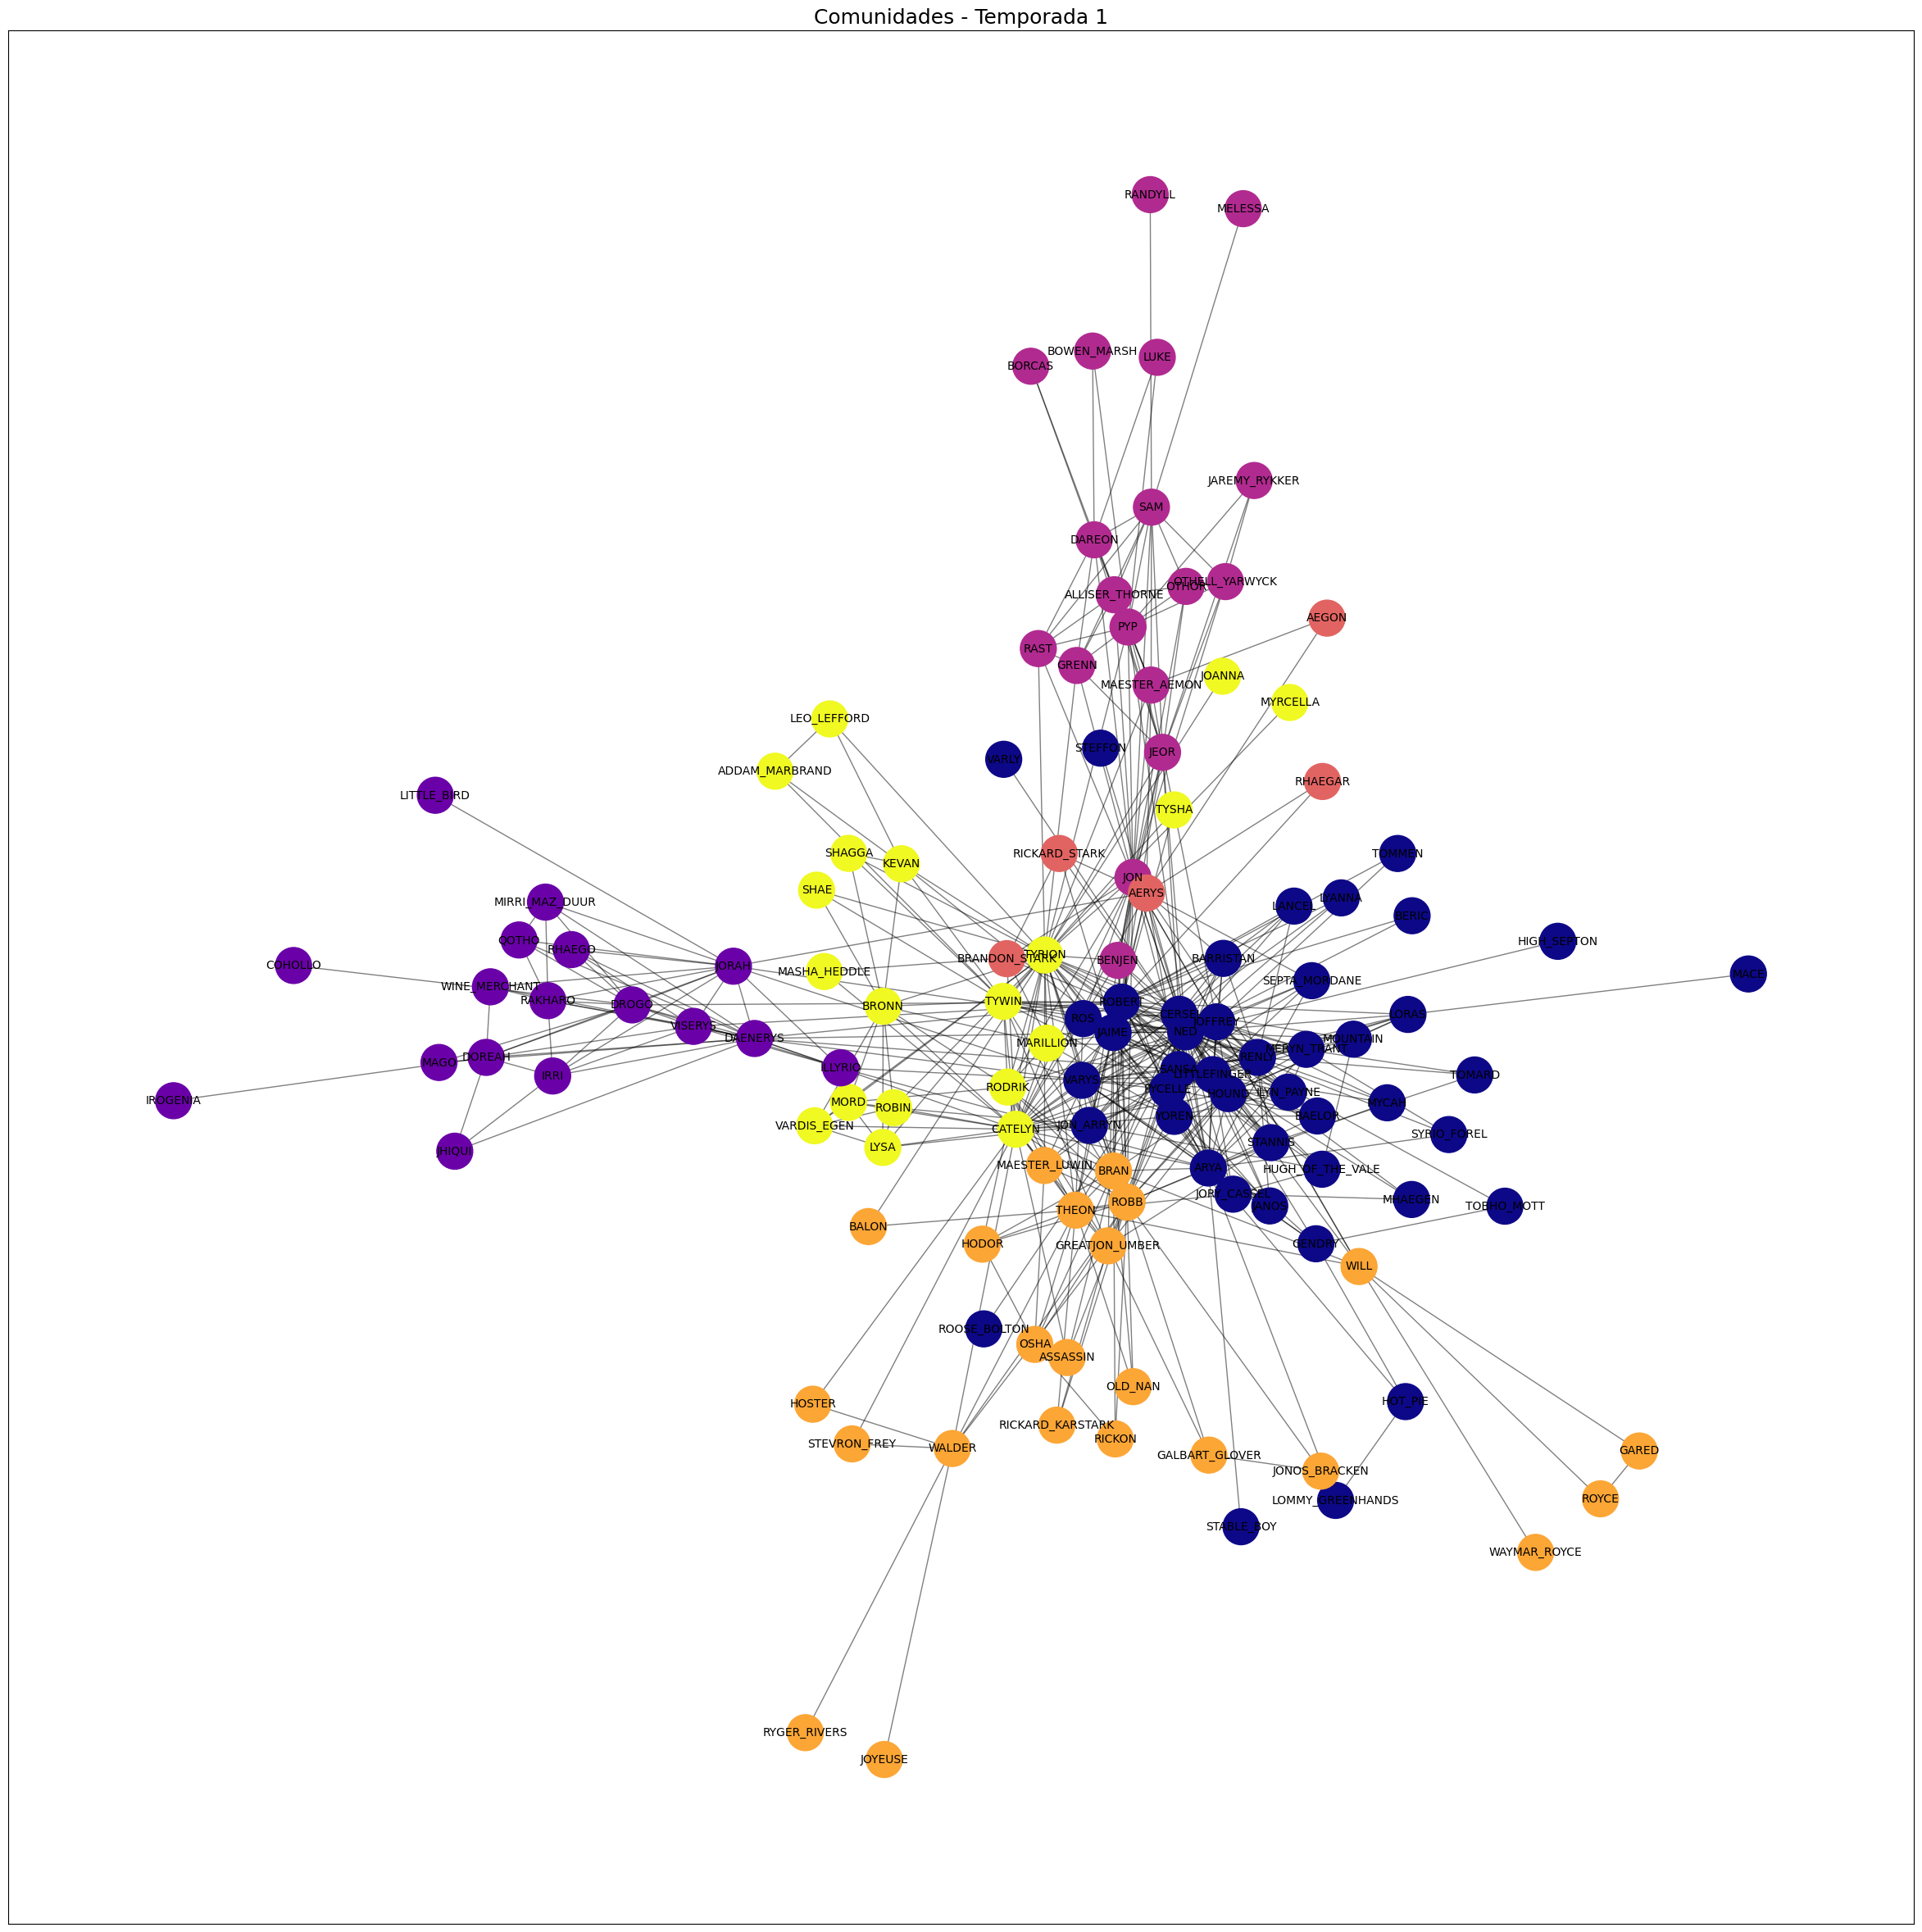

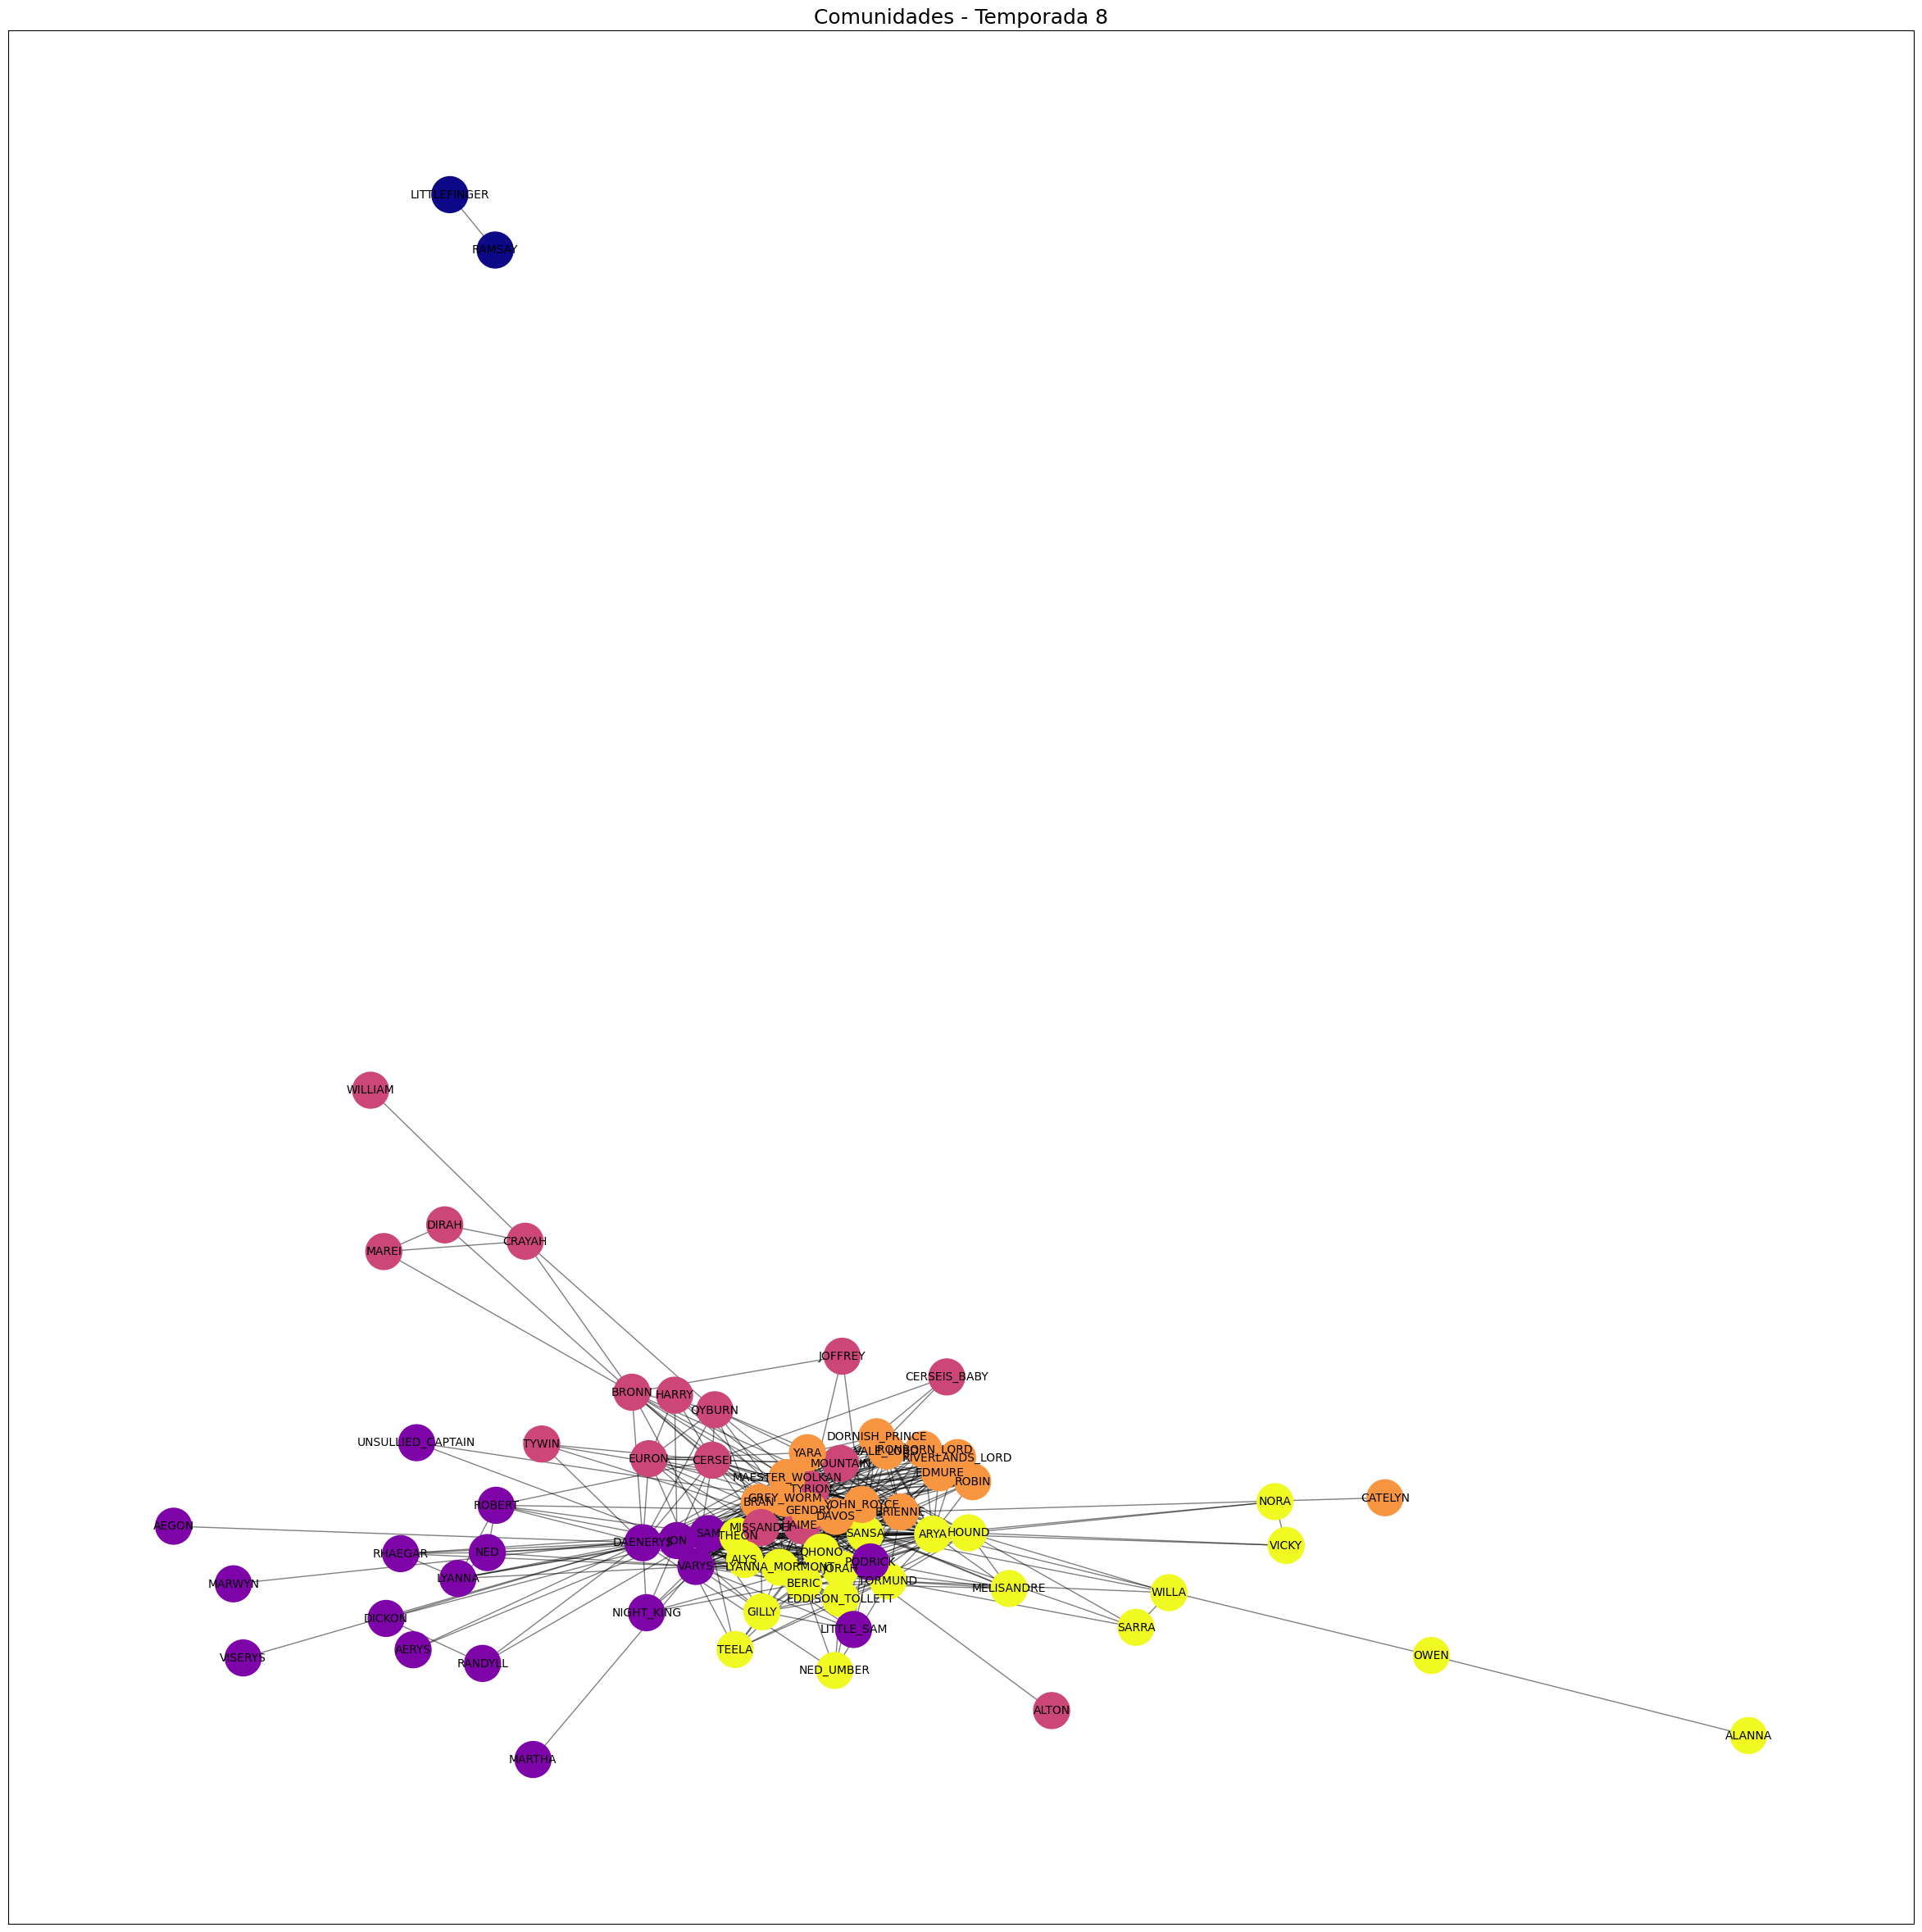

In [7]:
def plot_communities(G, title):
    communities = cl.best_partition(G)

    plt.figure(figsize=(30, 30))
    pos = nx.spring_layout(G)
    cmap = cm.get_cmap('plasma', max(communities.values()) + 1)

    nx.draw_networkx_nodes(G, pos, communities.keys(), node_size=1000,
                           cmap=cmap, node_color=list(communities.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10)

    plt.title(title,  fontsize=18)
    plt.show()

plot_communities(Grafo_Temporada1, "Comunidades - Temporada 1")
plot_communities(Grafo_Temporada2, "Comunidades - Temporada 8")


#**Análises**

##**DISTRIBUIÇÃO DE GRAUS**

• **Temporada 1**: A distribuição de graus é assimétrica, com a maioria dos personagens tendo poucas conexões (grau entre 0 e 10). Há poucos personagens com graus elevados, o que sugere uma estrutura de rede mais dispersa.

• **Temporada 8**: A rede da oitava temporada apresenta maior dispersão de graus, com mais personagens tendo graus entre 10 e 30. Isso indica uma maior centralização das interações em torno de alguns personagens, à medida que a trama converge para seus arcos finais.

##**MÉTRICAS ESTRUTURAIS**

**Grau Médio**:

• **Temporada 1**: 8.71

• **Temporada 8**: 14.95

O grau médio na Temporada 8 é significativamente maior, refletindo um aumento nas conexões entre os personagens principais.

**Densidade**:

• **Temporada 1**: 0.0697
• **Temporada 8**: 0.2047

A densidade da rede triplica na Temporada 8, mostrando uma maior interconexão entre os personagens, já que os arcos narrativos se concentram em menos personagens com mais interações.

**Transitividade**:

• **Temporada 1**: 0.383

• **Temporada 8**: 0.644

A transitividade, ou grau de agrupamento, é consideravelmente mais alta na Temporada 8, indicando que os personagens formam grupos mais coesos. Na última temporada, há uma maior probabilidade de os vizinhos de um personagem estarem conectados entre si.

**Personagens Centrais**

Na análise de centralidade (grau, intermediação, proximidade e autovetor):

• **Temporada 1**: Ned Stark se destaca como o personagem mais central em todas as medidas, seguido por Tyrion Lannister e Robert Baratheon. Isso reflete seu papel proeminente na narrativa inicial.

• **Temporada 8**: Daenerys Targaryen e Tyrion Lannister aparecem como os mais centrais. Tyrion mantém sua centralidade ao longo da série, enquanto
personagens como Ned e Robert desaparecem após suas mortes.

##**DETECÇÃO DE COMUNIDADES**

As redes de ambas as temporadas foram particionadas em comunidades. A Temporada 1 apresenta uma estrutura de comunidade mais difusa, com várias subtramas acontecendo em paralelo. Já na Temporada 8, as comunidades são mais concentradas, refletindo a união de personagens centrais em torno de uma narrativa final. Embora o número de comunidades não seja necessariamente o mesmo, alguns personagens pertencem a comunidades semelhantes em ambas as temporadas, como Tyrion, que permanece central.

##**CONCLUSÃO**

A rede da Temporada 8 é mais densa e conectada, com um número maior de interações concentradas em menos personagens, refletindo a conclusão da série. Por outro lado, a rede da Temporada 1 é mais dispersa, com muitas interações ocorrendo em grupos menores e distribuídos, à medida que os personagens são apresentados. A centralidade de Tyrion Lannister em ambas as temporadas destaca sua importância contínua ao longo da série, enquanto outros personagens centrais mudam conforme a narrativa avança.